# Stars Pinpointing
In this notebook we preprocess a noisy image of sky and locate the stars inside of it using classic image processing techniques

### Loading the necessary libraries:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Loading the image:

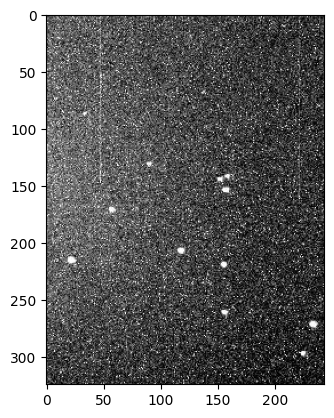

In [8]:
image = plt.imread("stars.jpg")
plt.imshow(image)
plt.show()

### Denoising:

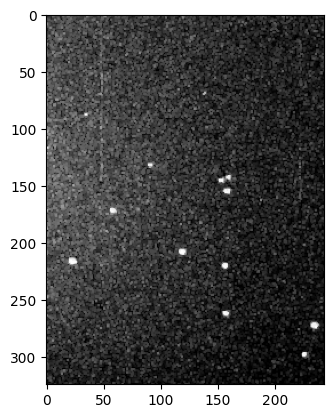

In [9]:
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

kernel = np.ones((2, 2), np.uint8)

denoised_image = cv2.morphologyEx(gray_img, cv2.MORPH_OPEN, kernel)

plt.imshow(denoised_image, cmap='gray')
plt.show()

### Contrast improvement:

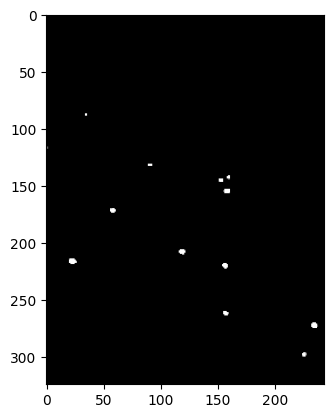

In [105]:
alpha=0.1
beta=-20

adjusted2 = cv2.addWeighted(denoised_image, alpha, np.zeros(denoised_image.shape, denoised_image.dtype), 0, beta)
plt.imshow(adjusted2, cmap='gray')
plt.show()

### Thresholding and Masking:

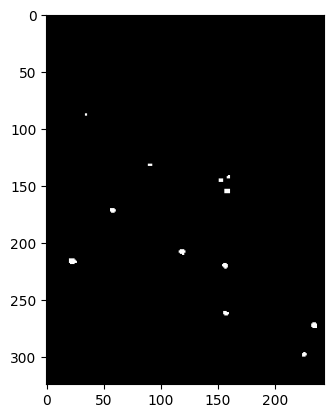

In [107]:
_, mask = cv2.threshold(adjusted2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(mask, cmap='gray')
plt.show()

### Total count and Coordination:

Total count:  12
Coordinates:  [(225, 297), (234, 272), (156, 261), (156, 219), (22, 215), (118, 207), (57, 171), (158, 154), (152, 145), (159, 142), (90, 131), (34, 87)]


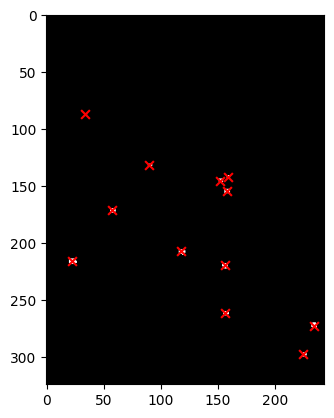

In [114]:
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

star_count = 0
star_coords = []

for contour in contours:
    
    area = cv2.contourArea(contour)
    if area > 0.9: 
        star_count += 1
        
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            star_coords.append((cX, cY))

print("Total count: ", star_count)
print("Coordinates: ", star_coords)

star_coords_n = np.array(star_coords)
plt.imshow(mask, cmap='gray')
plt.scatter(star_coords_n[:,0], star_coords_n[:,1], marker='x', c='r', s=40)
plt.show()